In [176]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

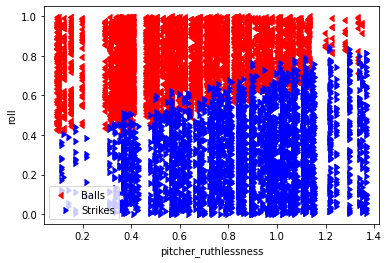

In [189]:
df['svc'] = 0.3769157113013683 * df["pitcher_ruthlessness"] + 0.2988509078502799 * df["ballpark_forwardness"] + 0.142415
df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]

x_val = "pitcher_ruthlessness"
fig, ax = plt.subplots(1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.legend()

# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [178]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values('pitcher_ruthlessness')

,pitcher_ruthlessness,pitcher_name
37,0.104391,Simba Davis
5987,0.109610,Simba Davis
2319,0.131158,Flattery McKinley
1035,0.159708,Persephone Splotter
7223,0.204305,Persephone Splotter
...,...,...
5857,1.236492,Theodore Cervantes
1041,1.289278,Brock Forbes
5992,1.327721,Gabriel Griffith
4760,1.341412,Burke Gonzales


In [179]:
df.groupby(['batter_name', 'pitcher_name']).size()

batter_name    pitcher_name    
--e- --varado  Beasley Gloom        8
               Bright Zimmerman    13
               Cornelius Games      9
               Inky Rutledge        4
               Logan Rodriguez      7
                                   ..
Ziwa Mueller   Finn James           6
               Leach Ingram         2
               Oscar Vaughan        4
               Simba Davis         15
               Winnie Hess          2
Length: 1386, dtype: int64

In [180]:
# X = df[['roll', *df.columns[5:-3]]].drop('pitcher_name', 1)
# X = df[['roll',
#        'batter_musclitude',
#        'pitcher_ruthlessness',
#        'defense_avg_chasiness',
#        'ballpark_grandiosity',
#        'ballpark_fortification', 'ballpark_obtuseness',
#        'ballpark_inconvenience', 'ballpark_viscosity', 'ballpark_forwardness',
#        'ballpark_mysticism', 'ballpark_elongation',
#        'pitcher_vibes']]
X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
y = df['passed']

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
trainedsvm = svm.SVC(kernel='linear').fit(X_train, y_train)
predictionsvm = trainedsvm.predict(X_test)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))


[[930  19]
 [ 23 712]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       949
        True       0.97      0.97      0.97       735

    accuracy                           0.98      1684
   macro avg       0.97      0.97      0.97      1684
weighted avg       0.98      0.98      0.98      1684



In [183]:
import numpy as np

coef = np.true_divide(trainedsvm.coef_,  sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

In [184]:
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (-0.3769157113013683, 'pitcher_ruthlessness'),
 (-0.2988509078502799, 'ballpark_forwardness')]

In [185]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept / coef[0, 0]

array([-0.14241542])

In [186]:
sc.inverse_transform(trainedsvm.coef_)

array([[-1.30246918,  1.45901194,  0.56905486]])

In [187]:
df_strikes = df[df['event_type'] == "StrikeLooking"]

In [188]:
df_strikes[df_strikes.roll == df_strikes.roll.max()]

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,ballpark_elongation,batting_team_hype,pitching_team_hype,batter_vibes,pitcher_vibes,game_id,play_count,svc,batter_strikeattr,ruth_and_fwd
1102,1102,StrikeLooking,0.843714,True,Lou Roseheart,0.569928,0.405447,1.257243,0.945831,1.291551,...,0.436543,0,0,0.153553,0.620751,e8421a0a-ee41-4158-8bb0-beb3b391bc95,23,0.771484,0.112244,0.911324
